In [1]:
import cv2
import mediapipe as mp

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [15]:
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False       
        
        results = holistic.process(image)
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))  
        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [27]:
import os
import csv
import numpy as np

In [28]:
num_coords = len(results.pose_landmarks.landmark)
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [29]:
with open('Pose_keypoints.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [77]:
class_name = 'Nothing' #Left #Right #Down #Up #Nothing

In [78]:
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        results = holistic.process(image)
        
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) 

        try:
            
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            row = pose_row 
            row.insert(0, class_name)
            
            with open('Pose_keypoints.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [79]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv('Pose_keypoints.csv')
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Left,0.627484,0.151723,-0.647896,0.998232,0.648523,0.121703,-0.603666,0.995263,0.657341,...,0.239542,0.109149,0.522030,0.995119,0.145659,0.049162,0.333944,0.966942,0.124182,0.058633
1,Left,0.641352,0.151721,-0.970539,0.998358,0.663978,0.121710,-0.934947,0.995574,0.673015,...,0.790160,0.101617,0.471389,1.217810,0.692263,0.046613,0.289944,1.177155,0.611688,0.055068
2,Left,0.651244,0.153861,-1.094983,0.998514,0.674605,0.122374,-1.056288,0.995984,0.684231,...,0.873756,0.101586,0.444216,1.300892,0.849193,0.044818,0.260650,1.272532,0.639477,0.057369
3,Left,0.662199,0.154675,-1.070333,0.998633,0.684339,0.122271,-1.033326,0.996270,0.694827,...,0.856349,0.100147,0.440901,1.434736,0.744298,0.041918,0.253972,1.375614,0.615659,0.056087
4,Left,0.661861,0.154551,-0.618257,0.998767,0.684329,0.122267,-0.596261,0.996634,0.694696,...,0.573611,0.104624,0.425197,1.521169,0.526637,0.042365,0.254608,1.464597,0.467664,0.059998


In [81]:
df["class"].value_counts()

Nothing    134
Down        98
Up          88
Left        81
Right       75
Name: class, dtype: int64

<AxesSubplot:ylabel='class'>

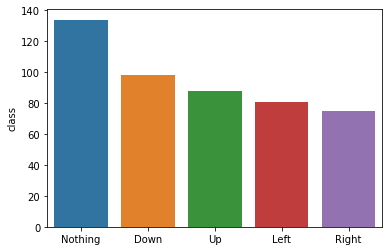

In [82]:
sns.barplot(df["class"].value_counts().index, df["class"].value_counts())